<a href="https://colab.research.google.com/github/kenclements/praxis/blob/main/adaboost-twos3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!nvidia-smi

Tue Feb 21 00:24:08 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P0    29W /  70W |    328MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import string
import re

#Vectorization and Tokenizing
from tensorflow import keras as tf
from tensorflow.keras import layers

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import MaxAbsScaler



#Models
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression


#Metrics and Testing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [7]:
# file1 = pd.read_csv('/Data/TWOS-dataset/email_ano/User1.csv')
# file2 = pd.read_csv('/Data/TWOS-dataset/email_ano/User2.csv')
# file3 = pd.read_csv('/Data/TWOS-dataset/email_ano/User3.csv')
# file4 = pd.read_csv('/Data/TWOS-dataset/email_ano/User4.csv')
# file6 = pd.read_csv('/Data/TWOS-dataset/email_ano/User6.csv')
# file7 = pd.read_csv('/Data/TWOS-dataset/email_ano/User7.csv')
# file8 = pd.read_csv('/Data/TWOS-dataset/email_ano/User8.csv')
# file9 = pd.read_csv('/Data/TWOS-dataset/email_ano/User9.csv')
# file10 = pd.read_csv('/Data/TWOS-dataset/email_ano/User10.csv')
# file11 = pd.read_csv('/Data/TWOS-dataset/email_ano/User11.csv')
# file12 = pd.read_csv('/Data/TWOS-dataset/email_ano/User12.csv')
# file13 = pd.read_csv('/Data/TWOS-dataset/email_ano/User13.csv')
# file14 = pd.read_csv('/Data/TWOS-dataset/email_ano/User14.csv')
# file15 = pd.read_csv('/Data/TWOS-dataset/email_ano/User15.csv')
# file16 = pd.read_csv('/Data/TWOS-dataset/email_ano/User16.csv')
# file17 = pd.read_csv('/Data/TWOS-dataset/email_ano/User17.csv')
# file18 = pd.read_csv('/Data/TWOS-dataset/email_ano/User18.csv')
# file19 = pd.read_csv('/Data/TWOS-dataset/email_ano/User19.csv')
# file20 = pd.read_csv('/Data/TWOS-dataset/email_ano/User20.csv')
# file21 = pd.read_csv('/Data/TWOS-dataset/email_ano/User21.csv')
# file22 = pd.read_csv('/Data/TWOS-dataset/email_ano/User22.csv')
# file23 = pd.read_csv('/Data/TWOS-dataset/email_ano/User23.csv')
# combined = pd.read_csv('/Data/TWOS-dataset/email_ano/combined.csv')
#test = pd.read_csv('/Data/TWOS-dataset/email_ano/test.csv')
#train = pd.read_csv('/Data/TWOS-dataset/email_ano/train.csv')
#imdb = pd.read_csv('/Data/TWOS-dataset/email_ano/IMDB Dataset.csv')
imdb = pd.read_csv('/content/drive/MyDrive/Praxis/data/IMDB Dataset.csv')



In [8]:
df = imdb
#df = pd.concat([file1, file2, file3, file4, file6, file7, file8, file9, file10, file11, file12, file13, file14, file15, file16, file17, file18, file19, file20, file21, file22, file23])

In [9]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [10]:
df.rename(columns={"review": "body_anon", "sentiment": "label"}, inplace=True)

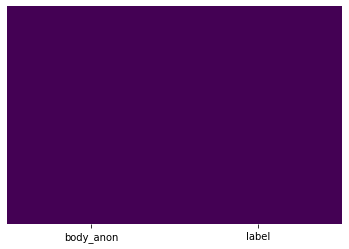

In [11]:
sb.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [12]:
df['label']

0        positive
1        positive
2        positive
3        negative
4        positive
           ...   
49995    positive
49996    negative
49997    negative
49998    negative
49999    negative
Name: label, Length: 50000, dtype: object

In [13]:
df.dropna(subset=['label'], inplace=True)


In [14]:
#df['body_anon'] = df['body_anon'].astype(str)

In [15]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer


In [16]:
df

,body_anon,label
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [17]:
def prep(dfx):
    dfx1 = [re.sub(r'[^\w\s]','', x) for x in dfx]
    dfx1 = ''.join(dfx1)
    return(dfx1)

#df1 = df['body_anon'].apply(prep)

In [18]:
nltk.download('stopwords')
stops = set(stopwords.words('english'))
#print(stops)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
def prepare_text(pretext):

    # tokenize mission.
    tokens = word_tokenize(pretext, language="english", preserve_line=True)

    # Parts of speech (POS) tag tokens.
    token_tag = pos_tag(tokens)
    
    # Only include some of the POS tags.
    include_tags = ['VBN', 'VBD', 'JJ', 'JJS', 'JJR', 'CD', 'NN', 'NNS', 'NNP', 'NNPS']
    filtered_tokens = (tok for tok, tag in token_tag if tag in include_tags)    
    #stem words.
    stemmed_tokens = (lancaster.stem(tok) for tok in filtered_tokens)

    #lemm words.
    lemmed_words = (lemmatizer.lemmatize(tok) for tok in stemmed_tokens)

    lower_words = [str.lower(tok) for tok in lemmed_words]

    #x = cv.fit_transform(tokens).toarray()

    joined = " ".join(lower_words);

    return(joined)

    #ps = PorterStemmer()
lancaster = LancasterStemmer()
lemmatizer = nltk.stem.WordNetLemmatizer()
    
#df['tokenized'] = df['body_anon'].apply(prepare_text)
df['tokenized'] = df['body_anon']



[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [20]:
df.head(1)


,body_anon,label,tokenized
0,One of the other reviewers has mentioned that ...,positive,One of the other reviewers has mentioned that ...


In [21]:
countvectorizer = CountVectorizer(analyzer= 'word', stop_words='english')
tfidfvectorizer = TfidfVectorizer(stop_words=None, analyzer='word' )

In [22]:
#count_wm = countvectorizer.fit_transform(df['body_anon'])
tfidf_wm = tfidfvectorizer.fit_transform(df['tokenized'])


In [23]:
#count_tokens = countvectorizer.get_feature_names_out()
#tfidf_tokens = tfidfvectorizer.get_feature_names_out()

In [24]:
# df_countvect = pd.DataFrame(data = count_wm.toarray(),columns = count_tokens)
# df_tfidfvect = pd.DataFrame(data = tfidf_wm.toarray(),columns = tfidf_tokens)
# print("Count Vectorizer\n")
# print(df_countvect)
# print("\nTD-IDF Vectorizer\n")
# print(df_tfidfvect)

In [25]:
# df = df.reset_index(drop=True)


In [26]:
# print(df.loc[50, 'tokenized'])

In [27]:

# print(tfidf_wm[50])


In [28]:
#transformer = MaxAbsScaler().fit(tfidf_wm)
#tfidf_wm = transformer.transform(tfidf_wm)

In [29]:
# print(tfidf_wm[50])

In [30]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(tfidf_wm, df['label'], test_size=.9) # 70% training and 30% test


**This is the Keras TF-IDF vectorization method**

In [ ]:
text_vectorizer = layers.TextVectorization(output_mode="tf-idf", ngrams=1)
text_vectorizer.adapt(df['tokenized'])
keras_vector = text_vectorizer(df['tokenized']).numpy()
X_train, X_test, y_train, y_test = train_test_split(keras_vector, df['label'], test_size=.3) # 70% training and 30% test


ADABOOST MODEL

In [ ]:
# # Create adaboost classifer object
# abc = AdaBoostClassifier(n_estimators=50, learning_rate=1) 
# # Train Adaboost Classifer
# model = abc.fit(X_train, y_train)

# #Predict the response for test dataset
# y_pred = model.predict(X_test)


In [ ]:
# print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


In [ ]:
# confusion_matrix(y_test, y_pred)

In [ ]:
# metrics.recall_score(y_test, y_pred)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import InputLayer
import torch

In [ ]:
number_of_classes = 1
number_of_features = 101895 #X_train.shape[1]
model = Sequential()

model.add(InputLayer(input_shape=(number_of_features, )))
# No hidden layers
model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.summary()

In [ ]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.05)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# a = X_train.tocoo()

In [ ]:
# values = a.data
# indices = np.vstack((a.row, a.col))

# i = torch.LongTensor(indices)
# v = torch.FloatTensor(values)
# shape = a.shape

# b = torch.sparse.FloatTensor(i, v, torch.Size(shape)).to_dense()

In [ ]:
# c = tf.convert_to_tensor(X_train.shape[0], dtype=tf.float32)

In [ ]:
# history = model.fit(c, y_train, epochs=10, batch_size=32, shuffle=False)

KNN Model

In [ ]:
# K = []
# training = []
# test = []
# scores = {}
  
# for k in range(2, 5):
#     clf = KNeighborsClassifier(n_neighbors = k)
#     clf.fit(X_train, y_train)
  
#     training_score = clf.score(X_train, y_train)
#     test_score = clf.score(X_test, y_test)
#     K.append(k)
  
#     training.append(training_score)
#     test.append(test_score)
#     scores[k] = [training_score, test_score]

In [ ]:
# scores

In [ ]:
# clf = KNeighborsClassifier(n_neighbors=2)
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)

In [ ]:
# y_pred

In [ ]:
# print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

In [ ]:
# confusion_matrix(y_test, y_pred)

In [ ]:
# plt.scatter(K, training, color ='k')
# plt.scatter(K, test, color ='g')
# plt.show()
# # For overlapping scatter plots

In [ ]:
# svm = SVC(kernel="poly", degree=1, gamma="scale")

In [ ]:
# svm.fit(X_train, y_train)

In [ ]:
# y_pred = svm.predict(X_test)

In [ ]:
# confusion_matrix(y_test, y_pred)

In [ ]:
# lr = LogisticRegression()

In [ ]:
# lr.fit(X_train, y_train)

In [ ]:
# y_pred = lr.predict(X_test)

In [ ]:
# y_pred

In [ ]:
# confusion_matrix(y_test, y_pred)

In [ ]:
# y_train_hat_probs = lr.predict_proba(X_test)[:,1]

In [ ]:
# y_train_hat_probs

In [ ]:
# nb = GaussianNB()

In [ ]:
# nb.fit(X_train.toarray(), y_train)

In [ ]:
# y_pred = nb.predict(X_test.toarray())

In [ ]:
# y_pred

In [ ]:
# confusion_matrix(y_test, y_pred)